<a href="https://colab.research.google.com/github/nipetrov/Homework-ML/blob/master/MLatFIAN2020_seminar02_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Consider the following toy dataset:

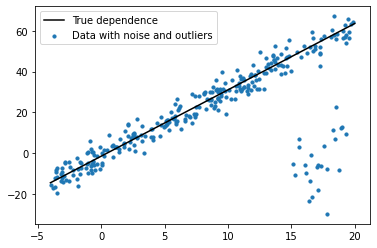

In [ ]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-4., 20.)

def generate_dataset(N=300):
  x = np.random.uniform(*limits, size=N)
  y = true_function(x) + noize_function(x)

  return x[:,None], y

X, y = generate_dataset()

x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

## Task 1

Implement a linear model $\hat y(x|w) = w_1\cdot x + w_0$ with MAE loss:
$$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - \hat y(x_i|w)\right|,$$
using gradient descent optimization in `numpy`.

*Hint: introduce a constant feature to account for the bias term to make the formulas simpler.*

Plot the learning curve and the final fit. Also, fit the same data with `sklearn`'s `LinearRegression`, and compare the two fits on the same plot. What do you observe? Write a short comment.

100%|██████████| 10000/10000 [00:00<00:00, 37187.86it/s]


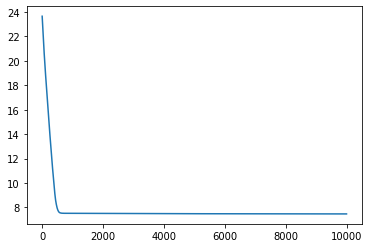

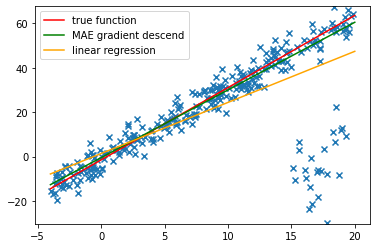

In [ ]:
loss_values = [] # a list to keep track of how the loss value changes
learning_rate = 0.001
X_expanded = np.concatenate([
    X, np.ones(shape=(len(X), 1))
], axis=1)
w = np.zeros(dtype=float, shape=X_expanded.shape[1])
from tqdm import trange, tqdm
for _ in trange(10000):
  gradient = X_expanded.T @ np.sign(X_expanded @ w - y)/len(X_expanded)
#  gradient = 2*X_expanded.T @ (X_expanded @ w - y)/ len(X_expanded)
  w -= learning_rate * gradient
  loss_values.append(
      (abs(X_expanded @ w - y)).mean()
#      ((X_expanded @ w - y)**2).mean()

  )
plt.plot(loss_values);
plt.show()
#########################
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
########################
x = np.linspace(-4, 20, 121)
x_expanded = np.concatenate([
    x[:,None],
    np.ones(shape=(len(x), 1))
], axis=1)
plt.plot(x, true_function(x), label='true function', c = 'red')
plt.scatter(X, y, marker = 'x');
plt.plot(x,
         x_expanded @ w, label='MAE gradient descend', c = 'green')
plt.plot(x, model.predict(x[:,None]), label='linear regression', c = 'orange')

plt.ylim(y.min() - 0.5, y.max() + 0.5)
plt.legend();

# Обнаружена разница между двумя методами. Разница вызвана разными loose функциями, которые минимизируем. 
